In [1]:
pip install networkx matplotlib


  Using cached networkx-3.5-py3-none-any.whl.metadata (6.3 kB)
Using cached networkx-3.5-py3-none-any.whl (2.0 MB)
Note: you may need to restart the kernel to use updated packages.


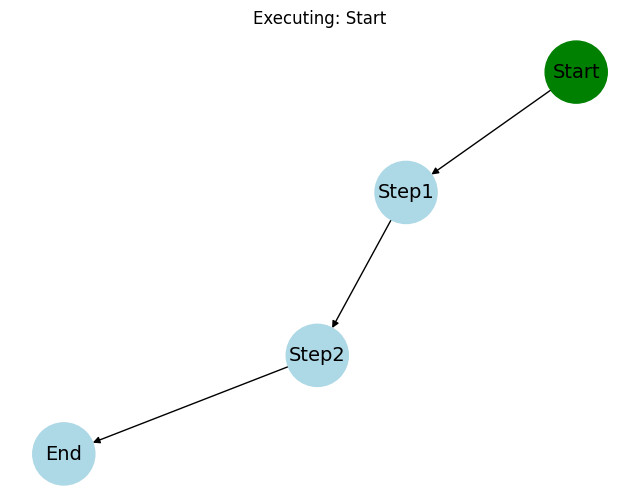

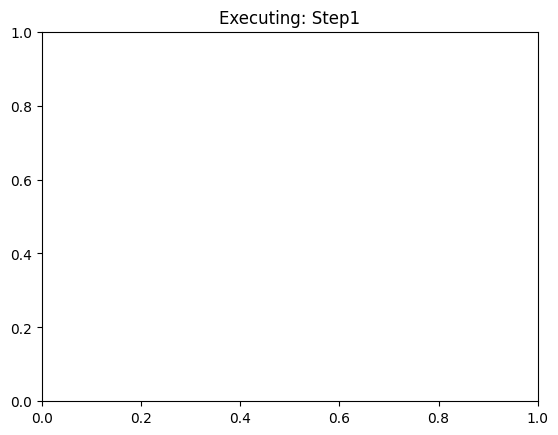

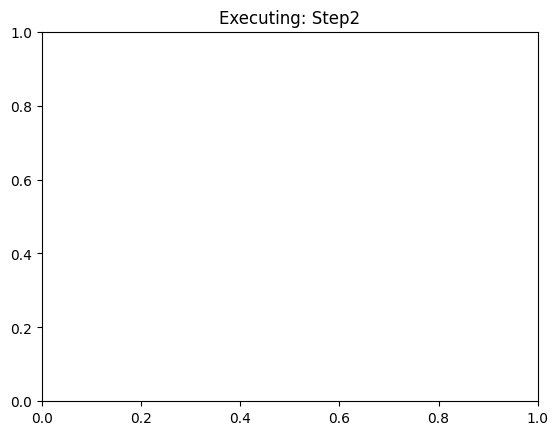

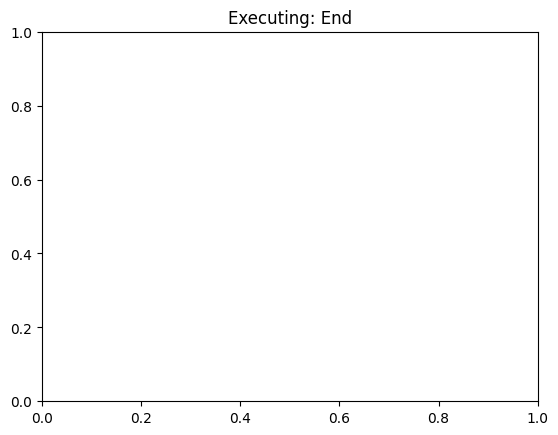

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import time

# Step 1: Define your graph structure
G = nx.DiGraph()
G.add_edges_from([
    ('Start', 'Step1'),
    ('Step1', 'Step2'),
    ('Step2', 'End')
])

pos = nx.spring_layout(G)

# Step 2: Simulate live execution
def run_animation(steps):
    plt.ion()
    fig, ax = plt.subplots(figsize=(8, 6))

    for i, step in enumerate(steps):
        ax.clear()
        color_map = ['green' if node == step else 'lightblue' for node in G.nodes()]
        nx.draw(G, pos, with_labels=True, node_color=color_map, node_size=2000, font_size=14, ax=ax)
        plt.title(f"Executing: {step}")
        plt.pause(1)  # wait 1 second

    plt.ioff()
    plt.show()

# Simulate LangGraph steps
execution_steps = ['Start', 'Step1', 'Step2', 'End']
run_animation(execution_steps)


In [3]:
pip install manim


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/625.9 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/625.9 kB ? eta -:--:--
   --------------------------------- ------ 524.3/625.9 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 625.9/625.9 kB 1.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/25.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/25.8 MB ? eta -:--:--
    --------------------------------------- 0.5/25.8 MB 1.8 MB/s eta 0:00:15
   - -------------------------------------- 0.8/25.8 MB 1.6 MB/s eta 0:00:16
   -- ------------------------------------- 1.3/25.8 MB 1.6 MB/s eta 0:00:15
   -- ------------------------------------- 1.8/25.8 MB 1.8 MB/s eta 0:00:14
   --- ------------------------------------ 2.4/25.8 MB 2.0 MB/s eta 0:00:12
   ---- ----------------------------------- 2.9/25.8 MB 2.1 MB/s eta 

  DEPRECATION: Building 'srt' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'srt'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [6]:
pip install ffmpeg-python


   ---------------------------------------- 0/2 [future]
   ---------------------------------------- 0/2 [future]
   ---------------------------------------- 0/2 [future]
   ---------------------------------------- 0/2 [future]
   ---------------------------------------- 0/2 [future]
   ---------------------------------------- 0/2 [future]
   -------------------- ------------------- 1/2 [ffmpeg-python]
   ---------------------------------------- 2/2 [ffmpeg-python]

Note: you may need to restart the kernel to use updated packages.


In [1]:
from manim import *

class LangGraphAnimatedFlow(Scene):
    def construct(self):
        # Create nodes
        start = Circle().set_fill(BLUE, opacity=0.8).move_to(LEFT*3)
        step1 = Circle().set_fill(GREEN, opacity=0.8).move_to(ORIGIN)
        end = Circle().set_fill(RED, opacity=0.8).move_to(RIGHT*3)

        # Labels
        start_label = Text("Start").scale(0.4).next_to(start, DOWN)
        step1_label = Text("Step1").scale(0.4).next_to(step1, DOWN)
        end_label = Text("End").scale(0.4).next_to(end, DOWN)

        # Arrows
        a1 = Arrow(start.get_right(), step1.get_left(), buff=0.1)
        a2 = Arrow(step1.get_right(), end.get_left(), buff=0.1)

        # Message Box
        data_box = Text("msg: Hello").scale(0.5)

        self.play(FadeIn(start), FadeIn(start_label))
        self.play(FadeIn(step1), FadeIn(step1_label))
        self.play(FadeIn(end), FadeIn(end_label))
        self.play(Create(a1), Create(a2))

        # Animate data movement
        self.play(data_box.animate.move_to(start.get_right()))
        self.wait(0.5)
        self.play(data_box.animate.move_to(step1.get_left()))
        self.wait(0.5)
        data_box2 = Text("msg: Processed").scale(0.5).move_to(step1.get_right())
        self.play(Transform(data_box, data_box2))
        self.play(data_box.animate.move_to(end.get_left()))
        self.wait(1)


In [5]:
pip install streamlit pyvis networkx


   ---------------------------------------- 0.0/756.0 kB ? eta -:--:--
   --------------------------- ------------ 524.3/756.0 kB 2.7 MB/s eta 0:00:01
   ---------------------------------------- 756.0/756.0 kB 2.7 MB/s eta 0:00:00

   -------------------- ------------------- 1/2 [pyvis]
   ---------------------------------------- 2/2 [pyvis]

Note: you may need to restart the kernel to use updated packages.


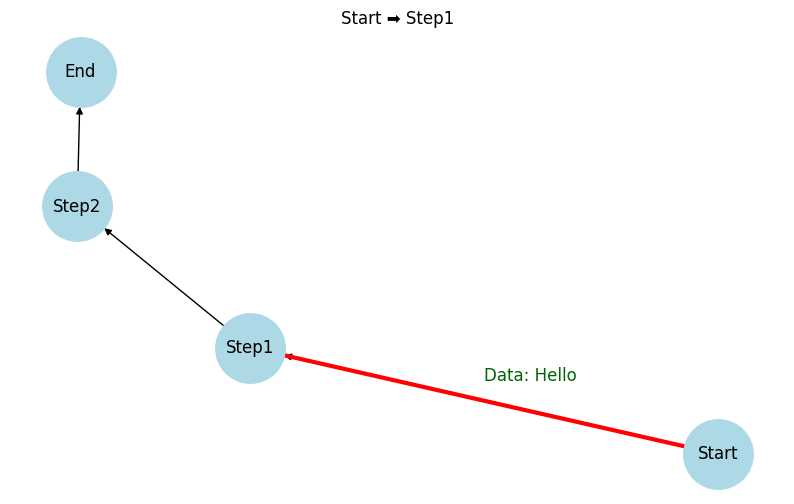

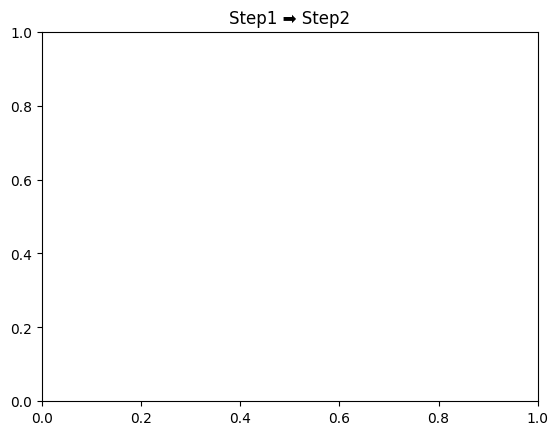

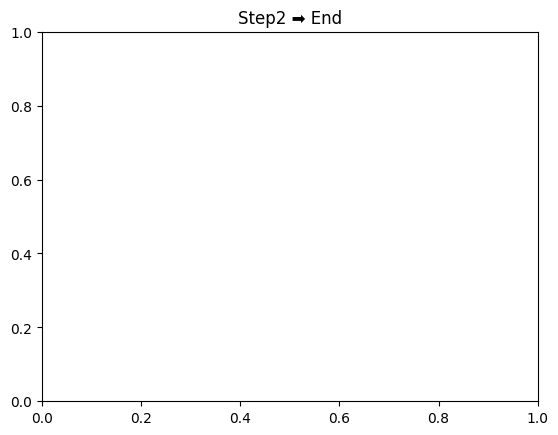

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import time

# Step 1: Define your graph
G = nx.DiGraph()
edges = [("Start", "Step1"), ("Step1", "Step2"), ("Step2", "End")]
G.add_edges_from(edges)
pos = nx.spring_layout(G, seed=42)

# Step 2: Simulated data flow
execution_trace = [
    {"from": "Start", "to": "Step1", "data": {"msg": "Hello"}},
    {"from": "Step1", "to": "Step2", "data": {"msg": "Processed-1"}},
    {"from": "Step2", "to": "End", "data": {"msg": "Final"}}
]

# Step 3: Real-time animation
def run_with_data_flow(trace):
    plt.ion()
    fig, ax = plt.subplots(figsize=(10, 6))

    for step in trace:
        ax.clear()

        # Base Graph
        nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2500, ax=ax, font_size=12)
        
        # Highlight current edge
        nx.draw_networkx_edges(
            G, pos,
            edgelist=[(step['from'], step['to'])],
            width=3,
            edge_color='red',
            ax=ax
        )
        
        # Display the message as annotation
        msg = step["data"]["msg"]
        midpoint = ((pos[step["from"]][0] + pos[step["to"]][0]) / 2,
                    (pos[step["from"]][1] + pos[step["to"]][1]) / 2)
        ax.text(midpoint[0], midpoint[1] + 0.1, f"Data: {msg}", fontsize=12, color="darkgreen")

        plt.title(f"{step['from']} ➡ {step['to']}")
        plt.pause(1)

    plt.ioff()
    plt.show()

run_with_data_flow(execution_trace)
